In [51]:
import sqlite3 as db
import pandas as pd, matplotlib, seaborn, collections
from sklearn.feature_extraction.text import TfidfVectorizer

%matplotlib inline

seaborn.set_style('darkgrid')

In [119]:
conn =  db.connect('/Users/davidyerrington/virtualenvs/data/livecoding.tv/job_scraper/jobs.db')
sql  =  """
SELECT * FROM jobs
GROUP BY url
"""

jobs_df = pd.read_sql(sql, con=conn)
conn.close()

## Top 10 Companies Hiring

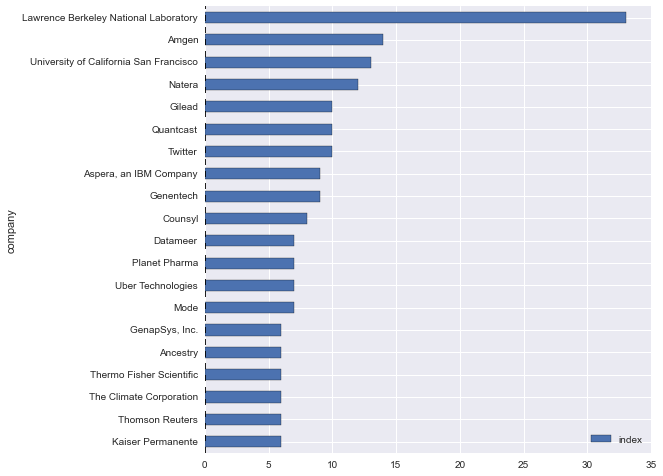

In [120]:
company_df = jobs_df.groupby(['company']).count().sort('index', ascending=False).head(20)
pd.DataFrame(company_df['index']).sort('index').plot(kind='barh', figsize=(8,8))

In [121]:
from nltk.util import ngrams
sentence = 'this is a foo bar sentences and i want to ngramize it'
n = 6
sixgrams = ngrams(sentence.split(), n)
for grams in sixgrams:
  print grams

('this', 'is', 'a', 'foo', 'bar', 'sentences')
('is', 'a', 'foo', 'bar', 'sentences', 'and')
('a', 'foo', 'bar', 'sentences', 'and', 'i')
('foo', 'bar', 'sentences', 'and', 'i', 'want')
('bar', 'sentences', 'and', 'i', 'want', 'to')
('sentences', 'and', 'i', 'want', 'to', 'ngramize')
('and', 'i', 'want', 'to', 'ngramize', 'it')


In [122]:
N = 3
strparts = sentence.split(' ')

collections.Counter(tuple(strparts[i:i+N]) for i in xrange(len(strparts)-N))

Counter({('and', 'i', 'want'): 1, ('is', 'a', 'foo'): 1, ('i', 'want', 'to'): 1, ('bar', 'sentences', 'and'): 1, ('this', 'is', 'a'): 1, ('a', 'foo', 'bar'): 1, ('want', 'to', 'ngramize'): 1, ('sentences', 'and', 'i'): 1, ('foo', 'bar', 'sentences'): 1})

In [123]:
jobs_df['summary'].str.join('')

0     We are seeking a Associate Scientist III for a...
1     We are looking for a Data Scientist with exper...
2     We are looking for a Data Scientist with exper...
3     Our client analyzes EHR data, text, scanned do...
4     Works with product development team of scienti...
5     Associate Scientist II - R&D*. Bachelor s degr...
6     Works with product development team of scienti...
7     Clinical Lab Scientist - Chemistry. Apply curr...
8     Demonstrated ability to analyze large data set...
9     Data mining, predictive modeling, statistics, ...
10    He should be able to find wrong presentation o...
11    The role requires someone whose passion for di...
12    We are looking for talented scientists and eng...
13    We are looking for talented scientists and eng...
14    We are looking for talented scientists and eng...
...
809    Clover Health is driving down costs and produc...
810    We’re looking for data scientists with a passi...
811    This will include the building, dis

In [124]:
summaries  = ''

for summary in jobs_df['summary'].values:
    summaries += summary

In [138]:
vect = TfidfVectorizer(ngram_range=(2,2))

vect.build_preprocessor()(summaries)
vect.build_tokenizer()(summaries)
ngrams = vect.build_analyzer()(summaries)

In [139]:
from collections import Counter

counts_df = pd.DataFrame(Counter(ngrams), index=['count']).T

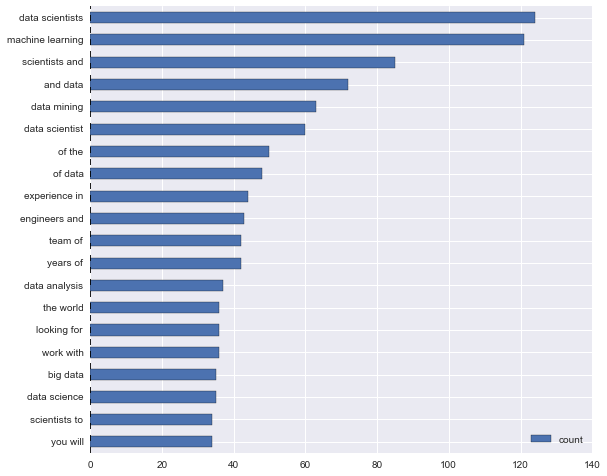

In [140]:
counts_df[counts_df['count'] > 5].sort('count', ascending=False).head(20).sort('count').plot(kind='barh', figsize=(9,8))